In [3]:
import numpy as np #module pour faire des maths et manipuler des tenseurs
import itertools #truc random pour faire marcher les graphs

import keras #le module de deep learning
from keras import backend as K #support de Keras (Tensorflow)
from keras.models import Sequential, load_model, Model # de quoi créer un modèle (et en charger un, au besoin)

from keras.layers.core import Dense, Flatten # des couches de neurones simples
from keras.layers.normalization import BatchNormalization # du preprocessing d'image
from keras.layers.convolutional import * # les résaux convolutifs pour l'analyse d'image

from keras.applications import imagenet_utils # du preprocessing

import tensorflowjs as tfjs # tensorflow js (conversion à la fin pour le web)

from keras.optimizers import Adam # sous programme responsable de la backpropagation
from keras.metrics import categorical_crossentropy, sparse_categorical_crossentropy, binary_crossentropy #différente fonctions de coûts
from keras.preprocessing.image import ImageDataGenerator # du preprocessing

from matplotlib import pyplot as plt # des graphiques
%matplotlib inline
from sklearn.metrics import confusion_matrix # des graphiques

from keras.utils.generic_utils import CustomObjectScope

print("MODULES : IMPORTATION COMPLETE")

Using TensorFlow backend.


MODULES : IMPORTATION COMPLETE


In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
            
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)// rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis("Off")
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else "none")

In [6]:
with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model = load_model('deepSoviet.h5')
model.summary() # on regarde son architecture
print("DEEPSOVIET : IMPORTATION COMPLETE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [7]:
train_path = "./next/train"
valid_path = "./next/valid"
test_path = "./next/test"

train_count = 2000
valid_count = 27

train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(train_path,target_size=(224,224), classes=["Communist","Other"],batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(valid_path,target_size=(224,224),classes=["Communist","Other"],batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(test_path,target_size=(224,224),classes=["Communist","Other"],batch_size=50, shuffle=False)

Found 691 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
10


In [6]:
model.fit_generator(train_batches,steps_per_epoch=train_count/train_batches.batch_size,validation_data=valid_batches,validation_steps=valid_count/valid_batches.batch_size,epochs=7,verbose=1)

Epoch 1/7
27/69 [==========>...................] - ETA: 21s - loss: 0.2551 - acc: 0.9074

C:\Users\Barthos\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3846701056 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))


52/69 [=====================>........] - ETA: 7s - loss: 0.2180 - acc: 0.9250

C:\Users\Barthos\Anaconda3\lib\site-packages\PIL\Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


69/69 [==============================] - 30s 440ms/step - loss: 0.2228 - acc: 0.9203 - val_loss: 0.2006 - val_acc: 0.9200
Epoch 2/7
69/69 [==============================] - 24s 352ms/step - loss: 0.1097 - acc: 0.9594 - val_loss: 0.2847 - val_acc: 0.8800
Epoch 3/7
69/69 [==============================] - 25s 356ms/step - loss: 0.0440 - acc: 0.9899 - val_loss: 0.3089 - val_acc: 0.8400
Epoch 4/7
69/69 [==============================] - 25s 358ms/step - loss: 0.0594 - acc: 0.9799 - val_loss: 0.0354 - val_acc: 1.0000
Epoch 5/7
69/69 [==============================] - 24s 351ms/step - loss: 0.0874 - acc: 0.9582 - val_loss: 0.0233 - val_acc: 1.0000
Epoch 6/7
69/69 [==============================] - 25s 356ms/step - loss: 0.0374 - acc: 0.9826 - val_loss: 0.0202 - val_acc: 1.0000
Epoch 7/7
69/69 [==============================] - 24s 347ms/step - loss: 0.0511 - acc: 0.9899 - val_loss: 0.0259 - val_acc: 1.0000


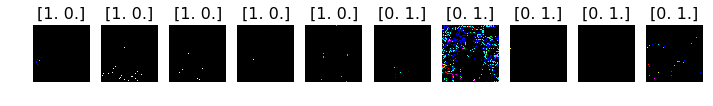

In [10]:
test_imgs, test_labels = next(test_batches) #affichage des images de test
plots(test_imgs, titles=test_labels)

In [11]:
predictions = model.predict_generator(test_batches,steps=1,verbose=2) #test
print("PREDICTION SUR LE TESTSET :")
print(np.round(np.multiply(predictions,100)))

PREDICTION SUR LE TESTSET :
[[86. 14.]
 [66. 34.]
 [45. 55.]
 [97.  3.]
 [73. 27.]
 [ 6. 94.]
 [73. 27.]
 [99.  1.]
 [89. 11.]
 [22. 78.]]


Confusion matrix, without normalization
[[2 3]
 [1 4]]


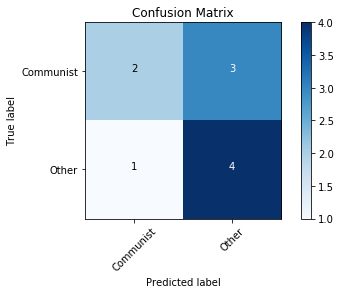

In [12]:
test_labels = test_labels[:,0]
cm = confusion_matrix(test_labels,np.round(predictions[:,0]))
cm_plot_labels = ["Communist","Other"]
plot_confusion_matrix(cm,cm_plot_labels,title="Confusion Matrix") #matrice de confusion pour évaluer l'IA

In [10]:
model.save("deepSoviet_next.h5")

In [11]:
tfjs.converters.save_keras_model(model,"TFJS_NEXT")